In [62]:
import cv2
import pandas as pd
import numpy as np
from scipy.stats import multivariate_normal as norm
import matplotlib.pyplot as plt
from sklearn.svm import SVC

In [63]:
file_train_b_csv=r'/home/jacobo15defrutos/AVS9/4-Red_Siamesa/Iris_train_basic_seg_list.csv'
df_train= pd.read_csv(file_train_b_csv)
labels_train= df_train['Label']
df_train

,Name,Label
0,331281_OD_SUP_CMV.jpg,1
1,2581150_OD_NAS_CMV.jpg,1
2,9730380_OD_TEM_SANO.jpg,0
3,331281_OD_INF_CMV.jpg,1
4,428663_OD_SUP_SANO.jpg,0
...,...,...
92,596480_OI_SUP_SANO.jpg,0
93,781208_OI_INF_SANO.jpg,0
94,331281_OI_INF_SANO.jpg,0
95,649387_OI_NAS_SURV.jpg,2


In [64]:
train_list=[]
target_size = (224, 224)
folder= '/home/jacobo15defrutos/AVS9/Data/saved_seg_class_images/train_basic/'
for name in df_train['Name']:
    path= folder + name
    img=cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    img= cv2.resize(img,target_size)
    img=img.ravel()
    train_list.append(img)

In [65]:
train= np.array(train_list)
train.shape

(97, 50176)

In [66]:
file_test_b_csv=r'/home/jacobo15defrutos/AVS9/4-Red_Siamesa/Iris_test_basic_seg_list.csv'
df_test= pd.read_csv(file_test_b_csv)
labels_test= df_test['Label']
test_list=[]
target_size = (224, 224)
folder= '/home/jacobo15defrutos/AVS9/Data/saved_seg_class_images/test/'
for name in df_test['Name']:
    path= folder + name
    img=cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    img= cv2.resize(img,target_size)
    img_dense = img.ravel()
    test_list.append(img_dense)
test= np.array(test_list)
test.shape

(20, 50176)

In [67]:
clf = SVC(gamma='scale',decision_function_shape='ovo',kernel='rbf')
clf.fit(train,labels_train)

SVC(decision_function_shape='ovo')

In [71]:
pred=clf.predict(test)
from sklearn.metrics import accuracy_score
acc=accuracy_score(labels_test,pred)
acc

0.5

In [72]:
file_val_b_csv=r'/home/jacobo15defrutos/AVS9/4-Red_Siamesa/Iris_val_basic_seg_list.csv'
df_val= pd.read_csv(file_val_b_csv)
labels_val= df_val['Label']
val_list=[]
target_size = (224, 224)
folder= '/home/jacobo15defrutos/AVS9/Data/saved_seg_class_images/val/'
for name in df_val['Name']:
    path= folder + name
    img=cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    img= cv2.resize(img,target_size)
    img_dense = img.ravel()
    val_list.append(img_dense)
val= np.array(val_list)
val.shape
pred_val=clf.predict(val)
acc_v=accuracy_score(labels_val,pred_val)
acc_v

0.6428571428571429

### Reducimos dimensionalidad para ver en 2 dimensiones

In [73]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda=LDA(n_components=2)
lda.fit(train,labels_train)

LinearDiscriminantAnalysis(n_components=2)

In [78]:
train_SANO_list=[]
train_CMV_list=[]
train_SURV_list=[]
target_size = (224, 224)
folder= '/home/jacobo15defrutos/AVS9/Data/saved_seg_class_images/train_total/'
for name in df_train['Name']:
    path= folder + name
    img=cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    img= cv2.resize(img,target_size)
    img=img.ravel()
    if 'SANO' in name:
        train_SANO_list.append(img)
    elif 'CMV' in name:
        train_CMV_list.append(img)
    elif 'SURV' in name:
        train_SURV_list.append(img)
train_SANO= np.array(train_SANO_list)
train_CMV= np.array(train_CMV_list)
train_SURV= np.array(train_SURV_list)
train_CMV.shape

(24, 50176)

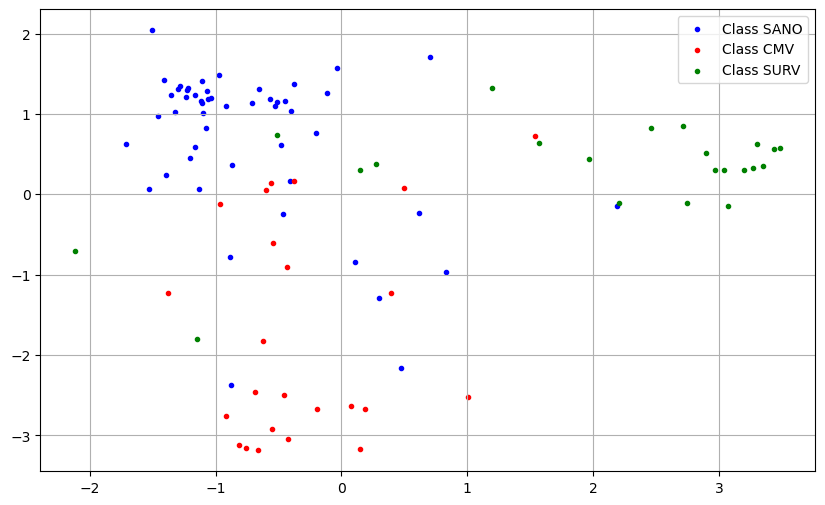

In [82]:
x_sano=lda.transform(train_SANO)
x_cmv=lda.transform(train_CMV)
x_surv=lda.transform(train_SURV)
figsize=(10,6)
fig ,ax = plt.subplots(figsize=figsize)
ax.grid()
ax.scatter(x_sano[:,0],x_sano[:,1],c='b',marker=".",label="Class SANO")
ax.scatter(x_cmv[:,0],x_cmv[:,1],c='r',marker=".",label="Class CMV")
ax.scatter(x_surv[:,0],x_surv[:,1],c='g',marker=".",label="Class SURV")
ax.legend()